## Taxi fare prediction

In this project we will try to predcit taxi fares in the city of new york using machine learning. The dataset that is used is from kaggle :

https://www.kaggle.com/c/new-york-city-taxi-fare-prediction

In [2]:
import pandas as pd

df = pd.read_csv('train.csv', parse_dates=['pickup_datetime'], nrows=500000)

## Data exploration

In [3]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


Let us create a df2 dataset that only contains trips whithin NY. This will allow us to make a visualization.

In [4]:
nyc_min_longitude = -74.05
nyc_max_longitude = -73.75

nyc_min_latitude = 40.63
nyc_max_latitude = 40.85

df2 = df.copy(deep=True)
for long in ['pickup_longitude', 'dropoff_longitude']:
    df2 = df2[(df2[long] > nyc_min_longitude) & (df2[long] < nyc_max_longitude)]

for lat in ['pickup_latitude', 'dropoff_latitude']:
    df2 = df2[(df2[lat] > nyc_min_latitude) & (df2[lat] < nyc_max_latitude)]

landmarks = {'JFK Airport': (-73.78,40.643),
             'Laguardia Airport': (-73.87, 40.77),
             'Midtown': (-73.98, 40.76),
             'Lower Manhattan': (-74.00, 40.72),
             'Upper Manhattan': (-73.94, 40.82),
             'Brooklyn': (-73.95, 40.66)} 

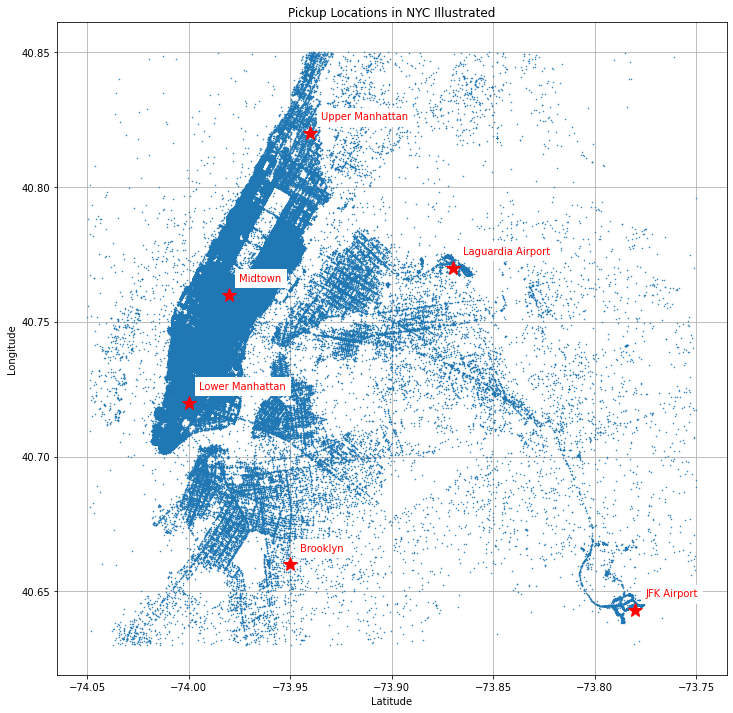

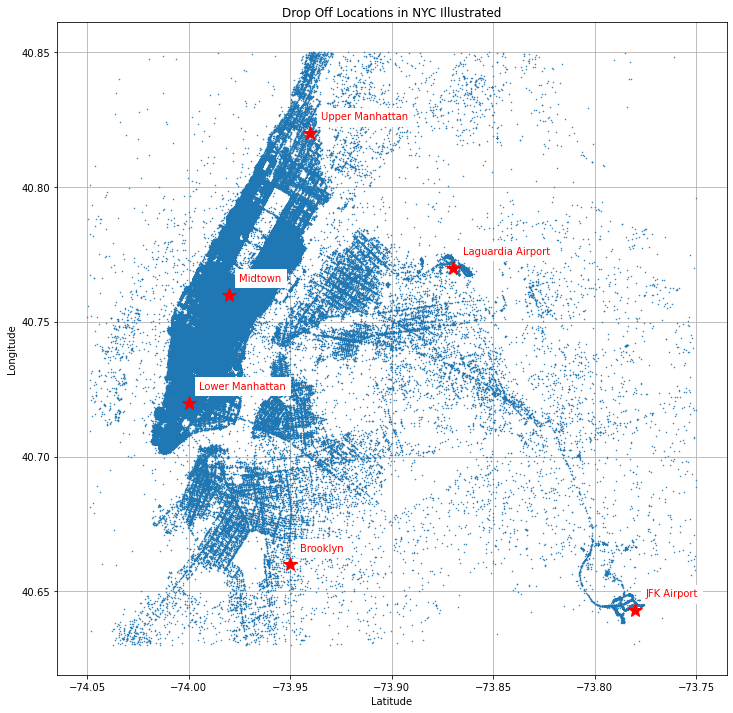

In [6]:
import matplotlib.pyplot as plt

def plot_lat_long(df, landmarks, points='Pickup'):
    plt.figure(figsize = (12,12)) # set figure size
    if points == 'pickup':
        plt.plot(list(df.pickup_longitude), list(df.pickup_latitude), '.', markersize=1)
    else:
        plt.plot(list(df.dropoff_longitude), list(df.dropoff_latitude), '.', markersize=1)

    for landmark in landmarks:
        plt.plot(landmarks[landmark][0], landmarks[landmark][1], '*', markersize=15, alpha=1, color='r') # plot landmark location on map
        plt.annotate(landmark, (landmarks[landmark][0]+0.005, landmarks[landmark][1]+0.005), color='r', backgroundcolor='w') # add 0.005 offset on landmark name for aesthetics purposes
  
    plt.title("{} Locations in NYC Illustrated".format(points))
    plt.grid(None)
    plt.xlabel("Latitude")
    plt.ylabel("Longitude")
    plt.show()


plot_lat_long(df2, landmarks, points='Pickup')

plot_lat_long(df2, landmarks, points='Drop Off')


Adding extra features such as year, month and day can help.

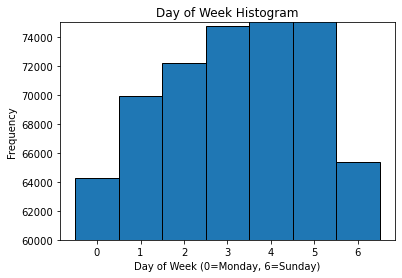

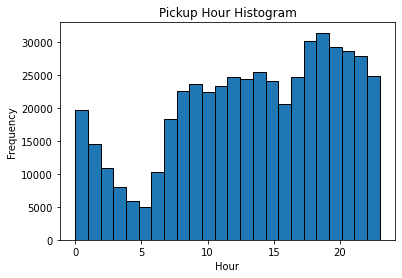

In [7]:
import numpy as np

df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['hour'] = df['pickup_datetime'].dt.hour

df['day_of_week'].plot.hist(bins=np.arange(8)-0.5, ec='black', ylim=(60000,75000))
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.title('Day of Week Histogram')
plt.show()

df['hour'].plot.hist(bins=24, ec='black')
plt.title('Pickup Hour Histogram')
plt.xlabel('Hour')
plt.show()

## Data preprocessing

In [8]:
df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
year                 0
month                0
day                  0
day_of_week          0
hour                 0
dtype: int64

Since there are only 5 lines with null values we can drop them

In [9]:
df.dropna()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_week,hour
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,2015-05-07 18:45:12.0000004,7.0,2015-05-07 18:45:12+00:00,-73.978775,40.766724,-73.966072,40.758537,1,2015,5,7,3,18
499996,2010-09-13 12:11:34.0000004,13.7,2010-09-13 12:11:34+00:00,-74.002932,40.718408,-74.009442,40.710952,1,2010,9,13,0,12
499997,2014-08-25 00:22:20.0000001,25.0,2014-08-25 00:22:20+00:00,-73.983885,40.725611,-73.896482,40.700980,1,2014,8,25,0,0
499998,2015-01-12 12:17:32.0000001,6.5,2015-01-12 12:17:32+00:00,-73.974617,40.756512,-73.970184,40.764801,6,2015,1,12,0,12


In [10]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_week,hour
count,500000.000000,500000.000000,500000.000000,499995.000000,499995.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,11.358361,-72.519958,39.920276,-72.522435,39.916526,1.683428,2011.739132,6.268650,15.684206,3.042008,13.510834
std,9.916617,11.856831,8.073475,11.797362,7.391002,1.307395,1.860889,3.437815,8.681066,1.949240,6.511571
min,-44.900000,-2986.242495,-3116.285383,-3383.296608,-2559.748913,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000
25%,6.000000,-73.992047,40.734917,-73.991382,40.734057,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000
50%,8.500000,-73.981785,40.752670,-73.980126,40.753152,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000
75%,12.500000,-73.967117,40.767076,-73.963572,40.768135,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000
max,500.000000,2140.601160,1703.092772,40.851027,404.616667,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000


Let us remove outliers for the fare ammount column since they are most likely due to errors.

In [14]:
df = df[(df['fare_amount'] >= 0) & (df['fare_amount'] <= 100)]

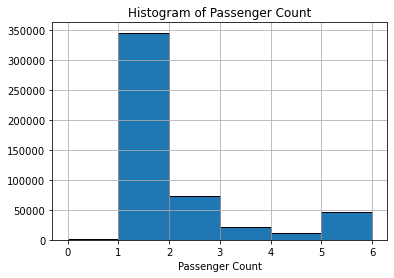

In [15]:
df['passenger_count'].hist(bins=6, ec='black')
plt.xlabel("Passenger Count")
plt.title("Histogram of Passenger Count")
plt.show()

In [16]:
df.loc[df['passenger_count']==0, 'passenger_count'] = 1

In [19]:
for long in ['pickup_longitude', 'dropoff_longitude']:
  df = df[(df[long] > nyc_min_longitude) & (df[long] < nyc_max_longitude)]

for lat in ['pickup_latitude', 'dropoff_latitude']:
  df = df[(df[lat] > nyc_min_latitude) & (df[lat] < nyc_max_latitude)]

## Feature engineering

In [21]:
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['hour'] = df['pickup_datetime'].dt.hour
df = df.drop(['pickup_datetime'], axis=1)

Let us create a new feature for the distance traveled :

In [23]:
def euc_distance(lat1, long1, lat2, long2):
    return(((lat1-lat2)**2 + (long1-long2)**2)**0.5)

df['travel_distance'] = euc_distance(df['pickup_latitude'],
                                     df['pickup_longitude'],
                                     df['dropoff_latitude'],
                                     df['dropoff_longitude'])

In [26]:
pd.Series.corr(df['travel_distance'], df['fare_amount'])

0.8836702130002521

As we can see, the correlation between travel distance and the fare is the highets of all our attributes !

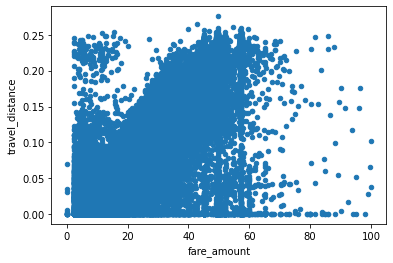

In [28]:
df.plot.scatter('fare_amount', 'travel_distance')
plt.show()

In [33]:
airports = {'JFK_Airport': (-73.78,40.643),
                    'Laguardia_Airport': (-73.87, 40.77),
                    'Newark_Airport' : (-74.18, 40.69)}

for airport in airports:
    df['pickup_dist_' + airport] = euc_distance(df['pickup_latitude'], df['pickup_longitude'], airports[airport][1], airports[airport][0])
    df['dropoff_dist_' + airport] = euc_distance(df['dropoff_latitude'], df['dropoff_longitude'], airports[airport][1], airports[airport][0])

In [34]:
    df = df.drop(['key'], axis=1)

## Feature scaling

In [37]:
from sklearn.preprocessing import scale

df_prescaled = df.copy()
df_scaled = df.drop(['fare_amount'], axis=1)
df_scaled = scale(df_scaled)
cols = df.columns.tolist()
cols.remove('fare_amount')
df_scaled = pd.DataFrame(df_scaled, columns=cols, index=df.index)
df_scaled = pd.concat([df_scaled, df['fare_amount']], axis=1)
df = df_scaled.copy()

## Model building

In [38]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'fare_amount'] 
y = df.fare_amount
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [42]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation='relu', input_dim = X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               2304      
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_12 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 9         
Total params: 12,913
Trainable params: 12,913
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(loss="mse", optimizer='adam', metrics=['mse'])
model.fit(X_train, y_train, epochs=1)

12086/12086 [==============================] - 13s 1ms/step - loss: 14.3212 - mse: 14.3212


## Results analysis

In [47]:
from sklearn.metrics import mean_squared_error

train_pred = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
print("Train RMSE: {:0.2f}".format(train_rmse))
print("Test RMSE: {:0.2f}".format(test_rmse))

Train RMSE: 3.57
Test RMSE: 3.53
